# Live Coding Python - Find Maxima
This notebook is the product of a live-coding session available here:  
https://youtu.be/9wvPsEzRWzI  
If you want to know more about the theory. Please visit this video also:  
https://youtu.be/f9vXOMKOlaY

The find maxima algorithm can be installed with pip: python3 -m pip install findmaxima2d.  
For more instructions please check here:   
https://github.com/dwaithe/MaximaFinder

In [1]:
#Our imports.
import matplotlib.pylab as plt
from findmaxima2d import find_maxima, find_local_maxima 
from PIL import Image
from skimage.measure import label
import numpy as np

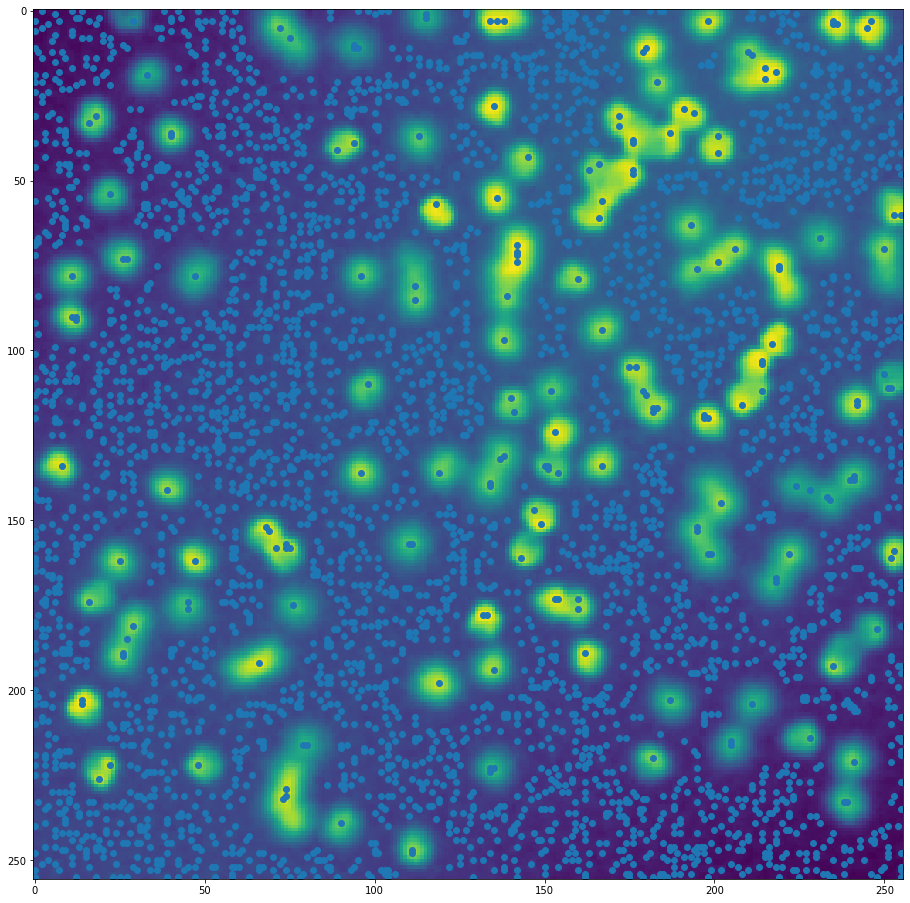

<Figure size 432x288 with 0 Axes>

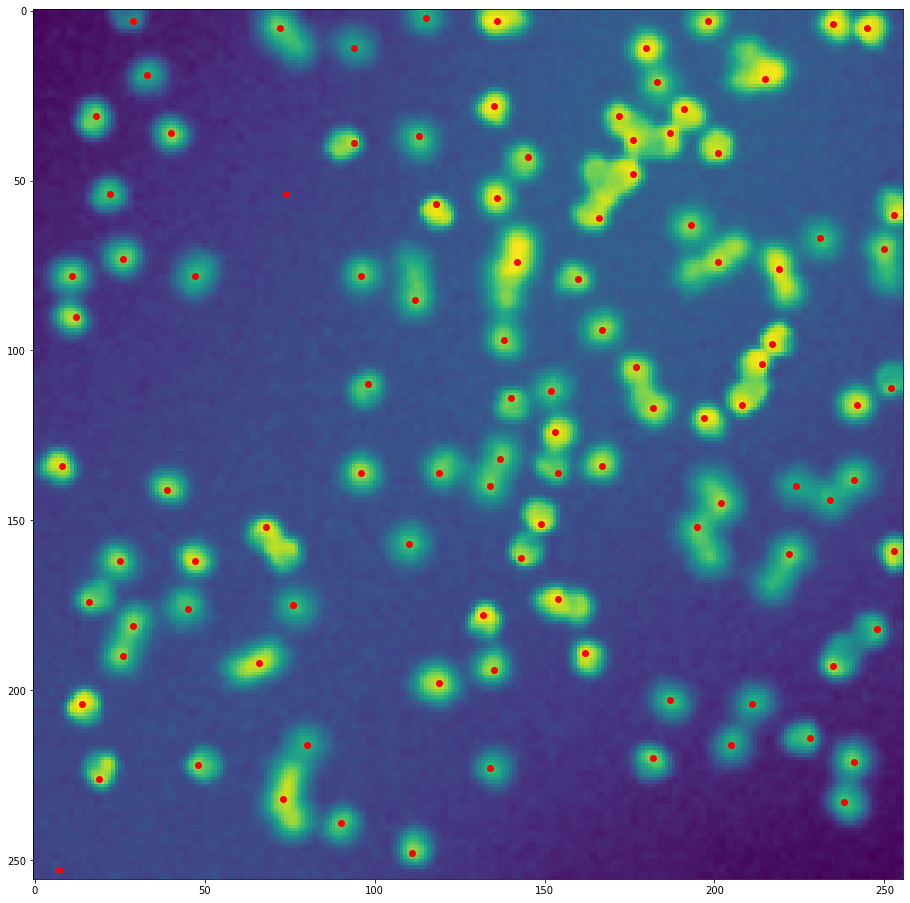

In [54]:
#Find maxima algorithm applied to single channel grayscale image.
img = Image.open('images/cell_fluorescent.tif')
img = np.array(img)

#Plotting and find maxima
plt.figure(figsize=(16,16))
plt.imshow(img)
local_max = find_local_maxima(img)
y,x = np.where(local_max)
plt.plot(x,y,'o')
plt.figure()
y,x,out = find_maxima(img, local_max,10)
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.plot(x,y,'ro')

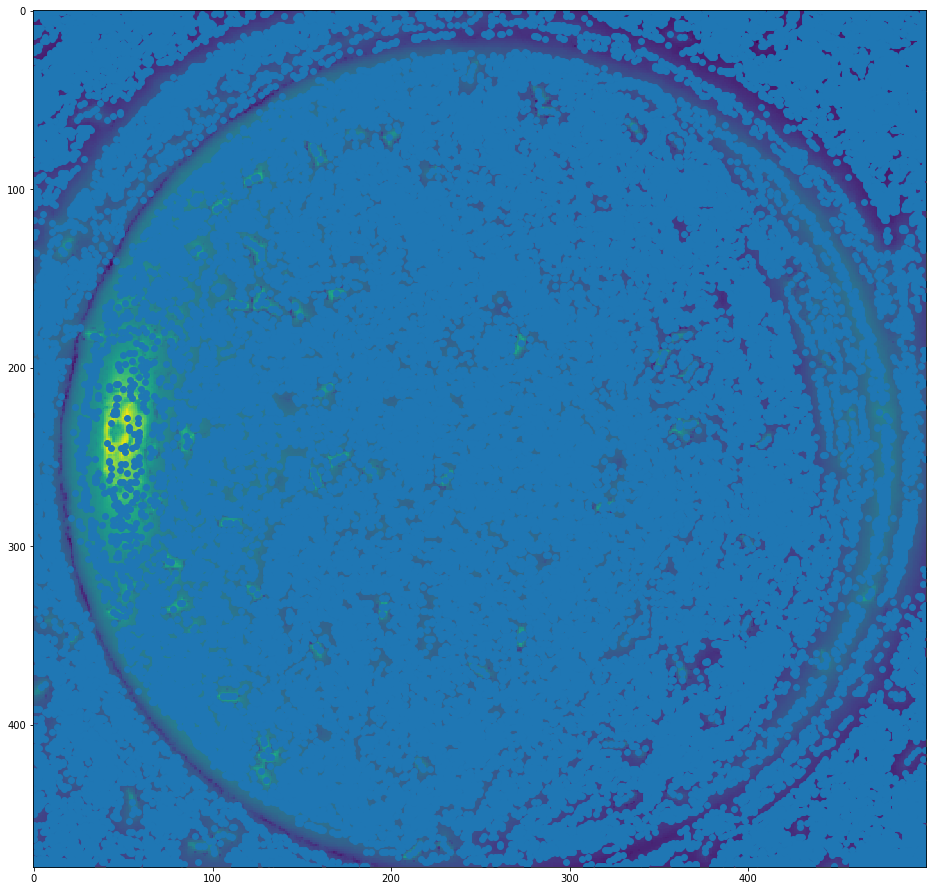

<Figure size 432x288 with 0 Axes>

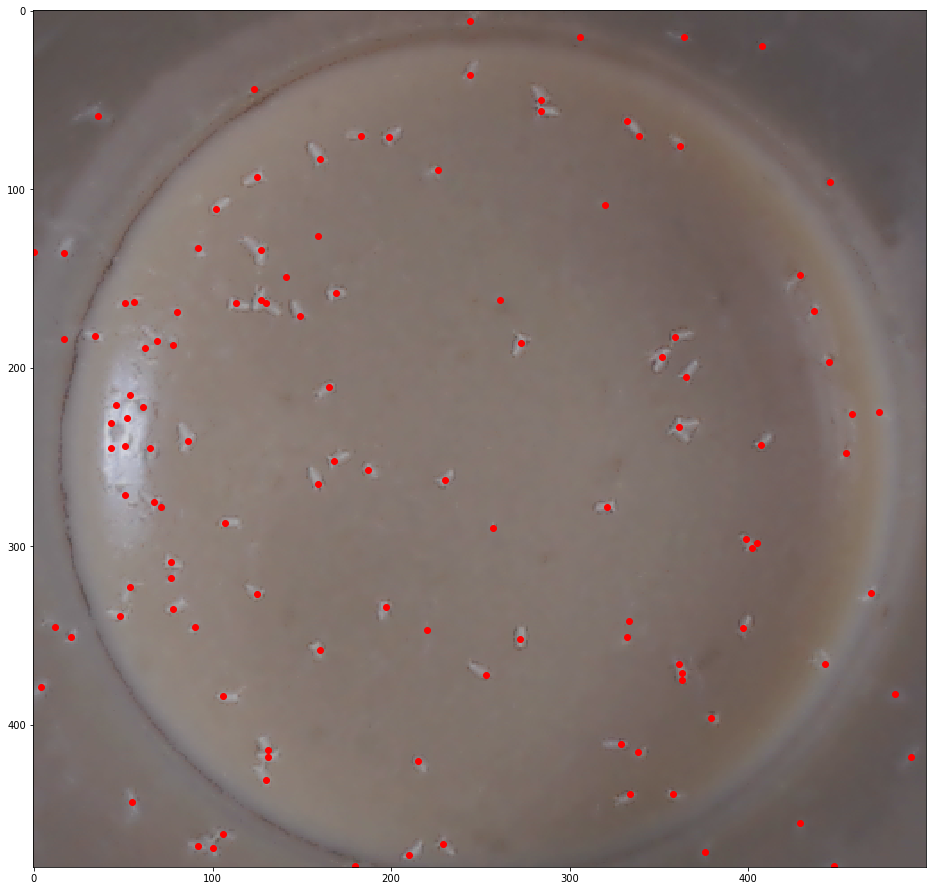

In [19]:
#Find maxima applied to RGB png image.
imgRaw = Image.open('images/002eggs.png')
img = np.array(np.average(imgRaw,2))
plt.figure(figsize=(16,16))
plt.imshow(img)
local_max = find_local_maxima(img)
y,x = np.where(local_max)
plt.plot(x,y,'o')

plt.figure()

y,x,out = find_maxima(img, local_max,10)

plt.figure(figsize=(16,16))
plt.imshow(imgRaw)
plt.plot(x,y,'ro')

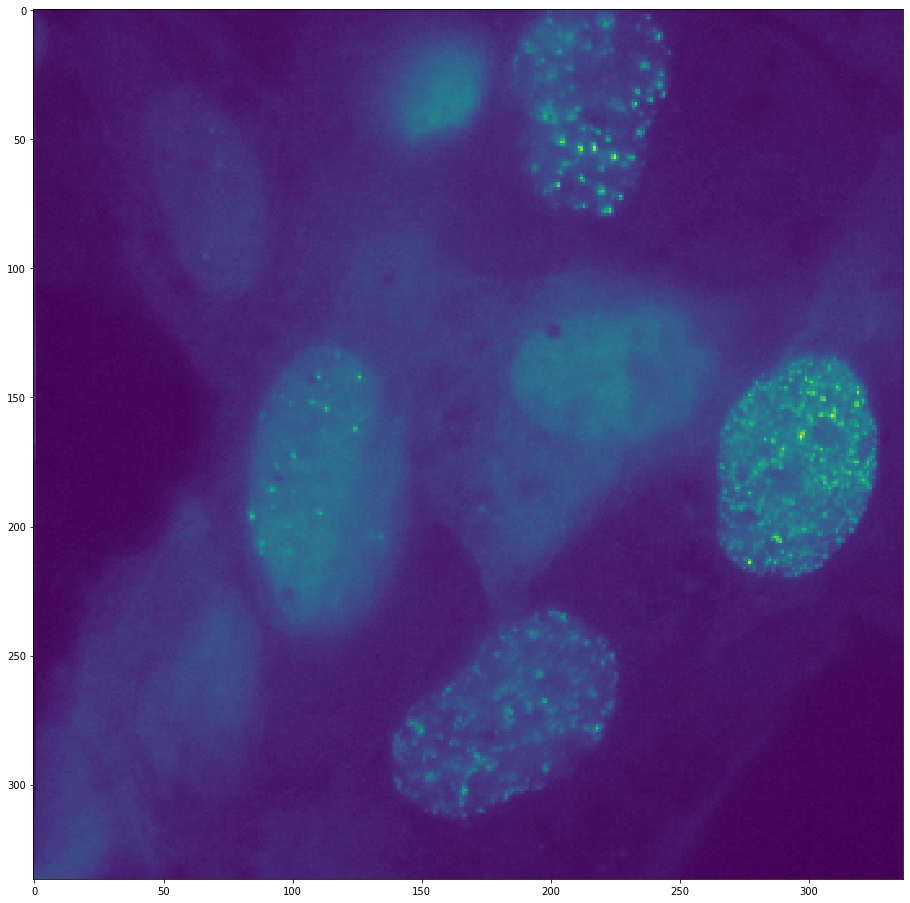

<Figure size 432x288 with 0 Axes>

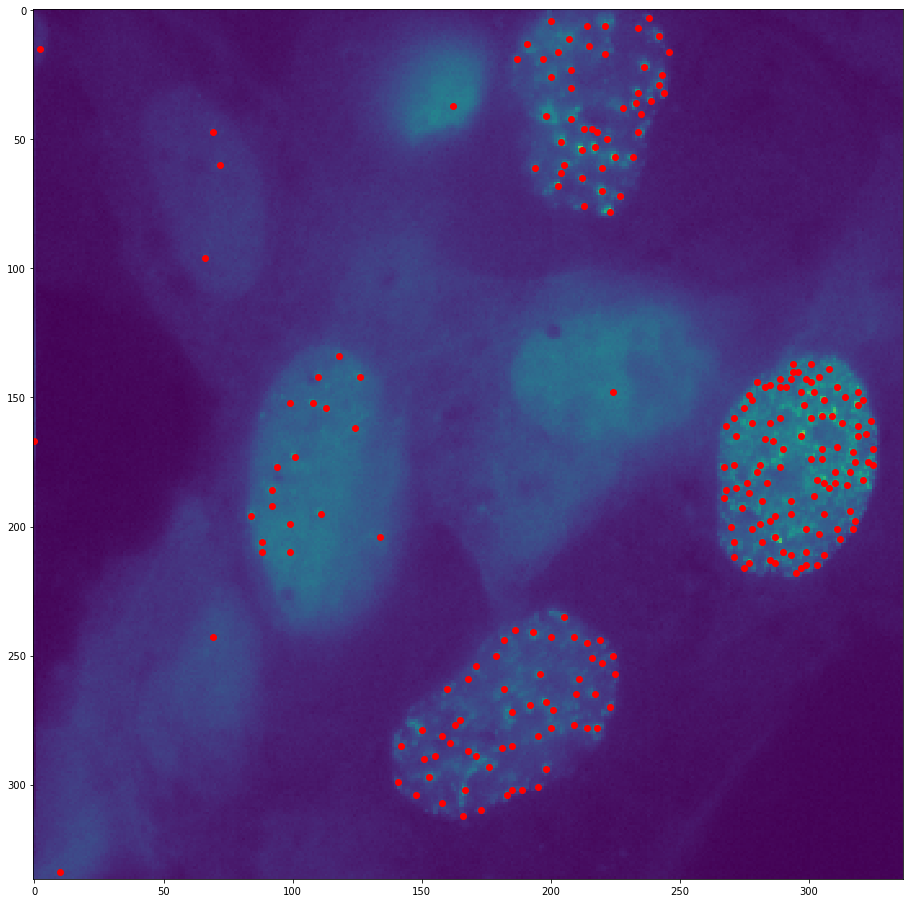

In [30]:
img = Image.open('images/C2-img_stk_x_-12099.4y_1489.2-1.tif')
img = np.array(img)/255.
plt.figure(figsize=(16,16))
plt.imshow(img)
local_max = find_local_maxima(img)
y,x = np.where(local_max)
#plt.plot(x,y,'o')

plt.figure()

y,x,out = find_maxima(img, local_max,4)

plt.figure(figsize=(16,16))
plt.imshow(img)
plt.plot(x,y,'ro')

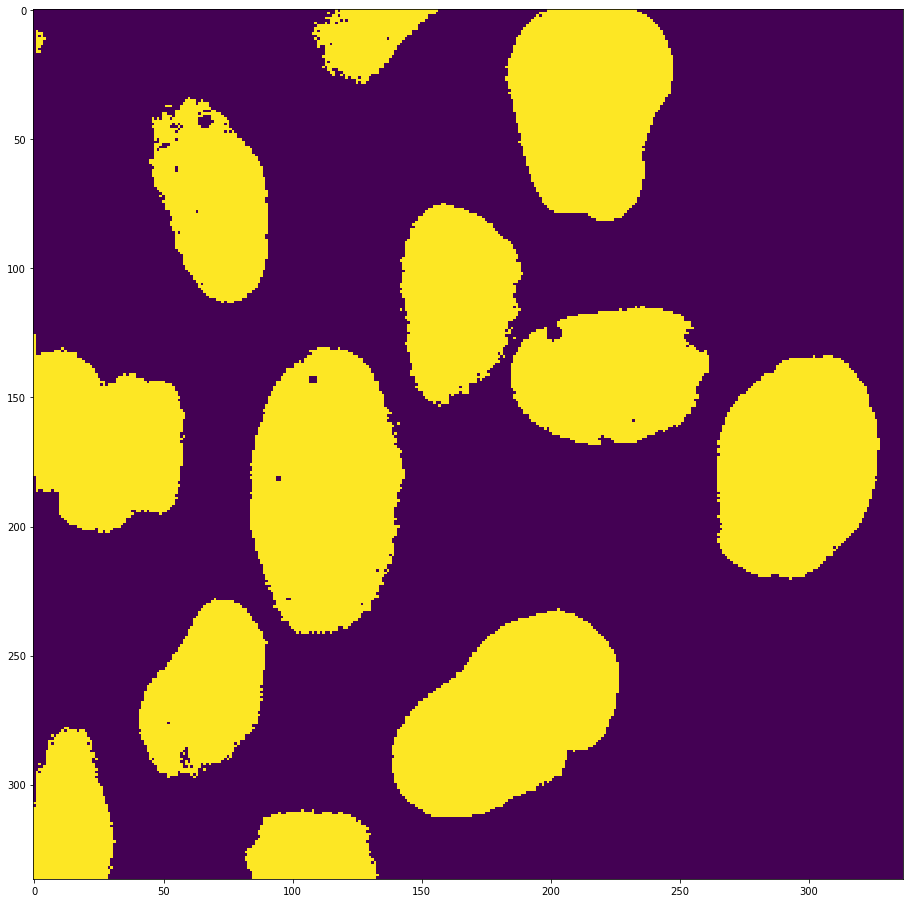

<Figure size 432x288 with 0 Axes>

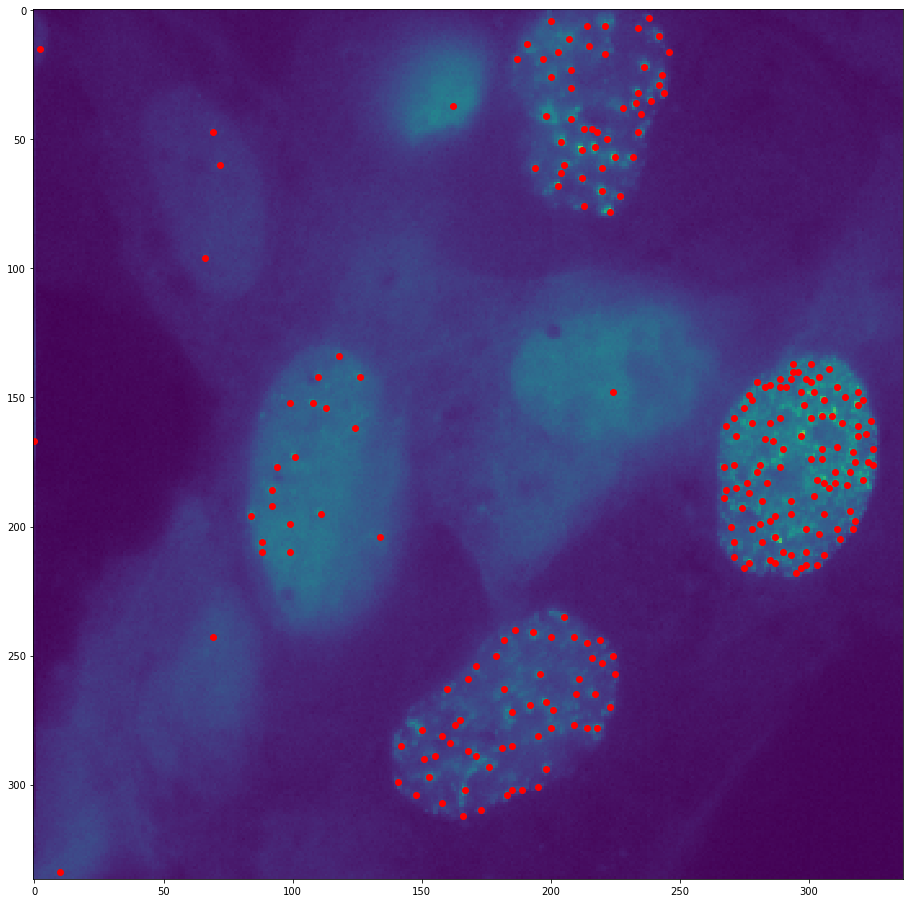

In [51]:
#16-bit grayscale image with segmentation mask.
img = Image.open('images/C2-img_stk_x_-12099.4y_1489.2-1.tif')
img = np.array(img)/255.
thr = Image.open('images/C1-img_stk_x_-12099.4y_1489.2-1.tif')
thr = np.array(thr)
#plotting and maxima detection
plt.figure(figsize=(16,16))
plt.imshow(thr)
local_max = find_local_maxima(img)
y,x = np.where(local_max)
plt.figure()
y,x,out = find_maxima(img, local_max,4)
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.plot(x,y,'ro')

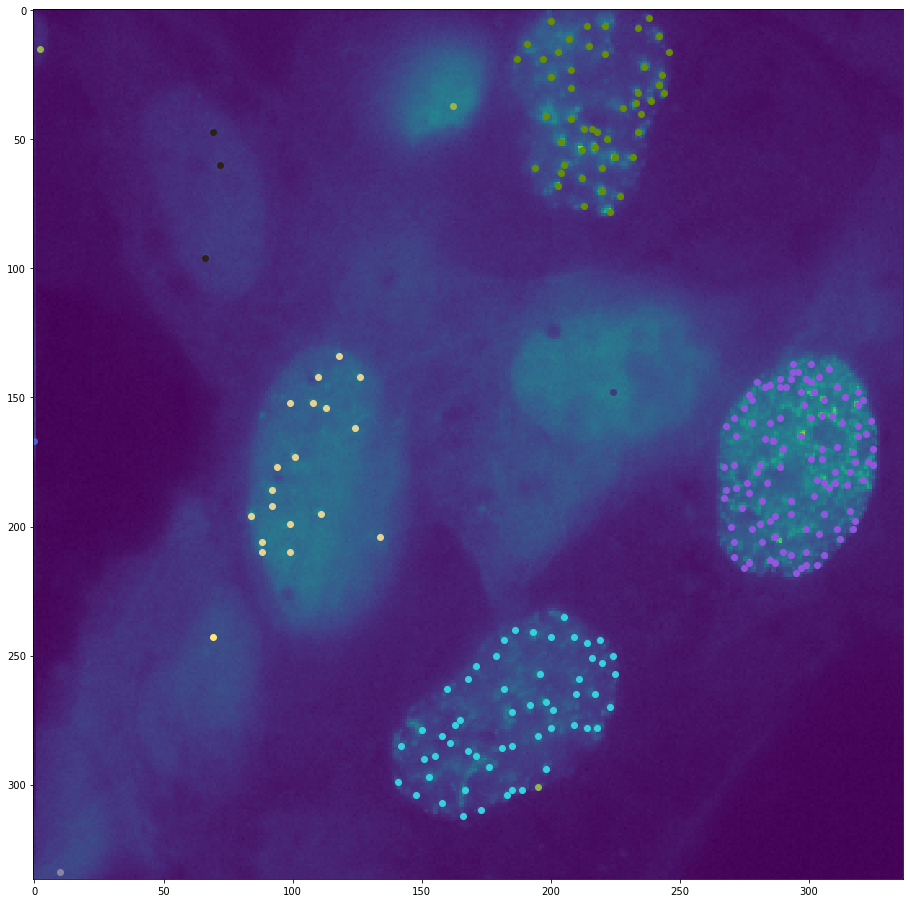

In [53]:
#Here we show how to count the number of foci in individual cells.
plt.figure(figsize=(16,16))
plt.imshow(img)

out = label(thr)

for c in range(0, np.max(out)):
    color = (np.random.random(),np.random.random(),np.random.random())
    binary = out==c
    score = 0
    sub_x = []
    sub_y = []
    for y0,x0 in zip(y,x):
        if binary[y0,x0] > 0:
            score +=1
            sub_x.append(x0)
            sub_y.append(y0)
    
    plt.plot(sub_x,sub_y,'o',color=color)
        
        